In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
grid_complexity_files = []
comp_complexity_files = []
for file_name in os.listdir('./'):
    if 'complexity' in file_name and 'grid' in file_name:
        grid_complexity_files.append( file_name )
    if 'complexity' in file_name and 'complete' in file_name:
        comp_complexity_files.append( file_name )
comp_complexity_files
    

['complexity[model=complete_gmi_ibound=10_delta=1_complete[n=50]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=28]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=10]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=12]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=16]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=14]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=18]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=26]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=24]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=20]].csv',
 'complexity[model=complete_gmi_ibound=10_delta=1_complete[n=22]].csv']

In [14]:
data = pd.DataFrame()
for complexity in grid_complexity_files:
    tmp = pd.read_csv(complexity, header='infer')
    data = data.append(tmp)
data

,size,alg,BE,BE time,approx Z,alg time,error
0,400,MBR,393.879051,23.123163,378.710434,0.433677,1.516862e+01
1,400,GBR,393.879051,23.123163,387.275690,56.018457,6.603361e+00
0,256,MBR,251.110153,1.120257,242.682768,0.177771,8.427385e+00
1,256,GBR,251.110153,1.120257,248.336785,13.913232,2.773368e+00
0,324,MBR,313.733656,5.122722,303.432454,0.276542,1.030120e+01
1,324,GBR,313.733656,5.122722,306.850204,32.925916,6.883452e+00
0,20,MBR,18.087830,0.016871,18.087830,0.006359,3.552714e-15
1,20,GBR,18.087830,0.016871,18.087830,0.005886,0.000000e+00
0,200,MBR,193.965215,10.669119,189.166986,0.121353,4.798229e+00
1,200,GBR,193.965215,10.669119,190.802606,7.030990,3.162608e+00


In [15]:
MBR = data[data['alg']=='MBR']
GBR = data[data['alg']=='GBR']
# MBR['BE time']-GBR['BE time']
MBR

,size,alg,BE,BE time,approx Z,alg time,error
0,400,MBR,393.879051,23.123163,378.710434,0.433677,1.516862e+01
0,256,MBR,251.110153,1.120257,242.682768,0.177771,8.427385e+00
0,324,MBR,313.733656,5.122722,303.432454,0.276542,1.030120e+01
0,20,MBR,18.087830,0.016871,18.087830,0.006359,3.552714e-15
0,200,MBR,193.965215,10.669119,189.166986,0.121353,4.798229e+00
0,196,MBR,192.312353,0.370715,186.533525,0.127581,5.778829e+00
0,225,MBR,217.524414,0.660054,210.916987,0.161792,6.607427e+00
0,50,MBR,47.942766,0.063959,47.161853,0.020698,7.809137e-01
0,49,MBR,47.007371,0.029414,46.345593,0.018370,6.617777e-01
0,361,MBR,356.679663,10.983169,343.496258,0.429337,1.318341e+01


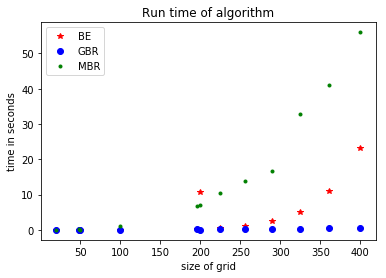

In [16]:
# 1) complexity of each algorithm: time vs. number of nodes
plt.plot(MBR['size'], MBR['BE time'], 'r*', MBR['size'], MBR['alg time'], 'bo', GBR['size'], GBR['alg time'], 'g.')
plt.title('Run time of algorithm')
plt.xlabel('size of grid')
plt.ylabel('time in seconds')
plt.legend({'BE','MBR','GBR'})
plt.savefig('runtime_grid.png')
# plt.show()

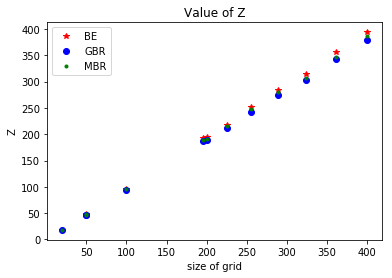

In [17]:

# 2) accuracy: Z value vs. number of nodes
plt.plot(MBR['size'], MBR['BE'], 'r*', MBR['size'], MBR['approx Z'], 'bo', GBR['size'], GBR['approx Z'], 'g.')
plt.title('Value of Z')
plt.legend({'BE','MBR','GBR'})
plt.xlabel('size of grid')
plt.ylabel('Z')
plt.savefig('zvalue_grid.png')
# plt.show()


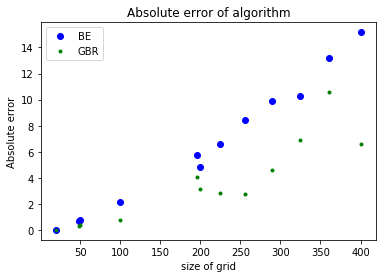

In [18]:
# 3) error vs. number of nodes
plt.plot(MBR['size'], MBR['error'], 'bo', GBR['size'], GBR['error'], 'g.')
plt.title('Absolute error of algorithm')
plt.legend({'BE','MBR','GBR'})
plt.xlabel('size of grid')
plt.ylabel('Absolute error')
plt.savefig('abserror_grid.png')
# plt.show()

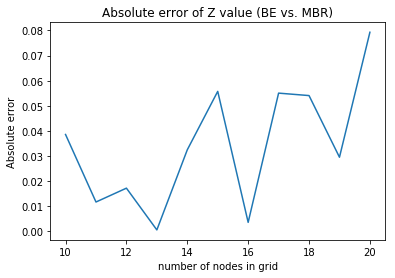

In [51]:
plt.plot(data[0].values, data[6].values)
plt.xlabel('number of nodes in grid')
plt.ylabel('Absolute error')
plt.title('Absolute error of Z value (BE vs. MBR)')
plt.show()
# , data[0].values, data[4].values, 'b'

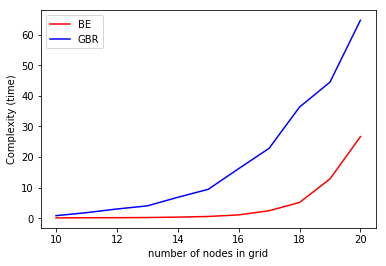

In [49]:
plt.plot(data[0].values, data[3].values, 'r', data[0].values, data[5].values, 'b')
plt.xlabel('number of nodes in grid')
plt.ylabel('Complexity (time)')
plt.legend({'BE', 'GBR'})

plt.show()